# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=2000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 761


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + '&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | quelimane
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | saratov
Processing Record 4 of Set 1 | malindi
Processing Record 5 of Set 1 | bay-khaak
Processing Record 6 of Set 1 | zhigansk
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | bubaque
Processing Record 10 of Set 1 | pokhara
Processing Record 11 of Set 1 | byron bay
Processing Record 12 of Set 1 | skwierzyna
Processing Record 13 of Set 1 | shimoda
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | alofi
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | tual
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | ribeira grande
Processing Record 

Processing Record 41 of Set 4 | waitati
Processing Record 42 of Set 4 | yerbogachen
Processing Record 43 of Set 4 | talnakh
Processing Record 44 of Set 4 | manokwari
Processing Record 45 of Set 4 | liuzhou
Processing Record 46 of Set 4 | port blair
Processing Record 47 of Set 4 | koshurnikovo
Processing Record 48 of Set 4 | la ronge
Processing Record 49 of Set 4 | pottstown
Processing Record 0 of Set 5 | correntina
Processing Record 1 of Set 5 | lavrentiya
Processing Record 2 of Set 5 | labu-o
Processing Record 3 of Set 5 | ilulissat
Processing Record 4 of Set 5 | victoriaville
Processing Record 5 of Set 5 | saldanha
Processing Record 6 of Set 5 | constitucion
Processing Record 7 of Set 5 | alice springs
Processing Record 8 of Set 5 | itarema
Processing Record 9 of Set 5 | mackenzie
Processing Record 10 of Set 5 | ust-kamchatsk
City not found. Skipping...
Processing Record 11 of Set 5 | warrington
Processing Record 12 of Set 5 | namtsy
Processing Record 13 of Set 5 | carballo
Processin

Processing Record 30 of Set 8 | evans
Processing Record 31 of Set 8 | ugoofaaru
Processing Record 32 of Set 8 | verkhnevilyuysk
Processing Record 33 of Set 8 | preston
Processing Record 34 of Set 8 | komsomolskiy
Processing Record 35 of Set 8 | pangai
Processing Record 36 of Set 8 | ostrovnoy
Processing Record 37 of Set 8 | moron
Processing Record 38 of Set 8 | korla
Processing Record 39 of Set 8 | longyearbyen
Processing Record 40 of Set 8 | kahului
Processing Record 41 of Set 8 | balabac
Processing Record 42 of Set 8 | la libertad
Processing Record 43 of Set 8 | niamey
Processing Record 44 of Set 8 | tokzar
City not found. Skipping...
Processing Record 45 of Set 8 | ellisras
Processing Record 46 of Set 8 | sidi bu zayd
City not found. Skipping...
Processing Record 47 of Set 8 | charters towers
Processing Record 48 of Set 8 | port hawkesbury
Processing Record 49 of Set 8 | horta
Processing Record 0 of Set 9 | esperance
Processing Record 1 of Set 9 | akyab
Processing Record 2 of Set 9 

Processing Record 18 of Set 12 | jardim
Processing Record 19 of Set 12 | zlatibor
Processing Record 20 of Set 12 | tres arroyos
Processing Record 21 of Set 12 | takoradi
Processing Record 22 of Set 12 | marsh harbour
Processing Record 23 of Set 12 | vila velha
Processing Record 24 of Set 12 | carsamba
Processing Record 25 of Set 12 | malwan
City not found. Skipping...
Processing Record 26 of Set 12 | sola
Processing Record 27 of Set 12 | zeya
Processing Record 28 of Set 12 | shenkursk
Processing Record 29 of Set 12 | usogorsk
Processing Record 30 of Set 12 | japura
Processing Record 31 of Set 12 | naze
Processing Record 32 of Set 12 | jacksonville
Processing Record 33 of Set 12 | povenets
Processing Record 34 of Set 12 | rocha
Processing Record 35 of Set 12 | opuwo
Processing Record 36 of Set 12 | sinnamary
Processing Record 37 of Set 12 | half moon bay
Processing Record 38 of Set 12 | dwarka
Processing Record 39 of Set 12 | shumikha
Processing Record 40 of Set 12 | kwinana
Processing 

Processing Record 8 of Set 16 | xining
Processing Record 9 of Set 16 | gangotri
City not found. Skipping...
Processing Record 10 of Set 16 | ikom
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          710
Lat           710
Lng           710
Max Temp      710
Humidity      710
Cloudiness    710
Wind Speed    710
Country       710
Date          710
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,quelimane,-17.8786,36.8883,80.55,88,40,0.00,MZ,1675720617
1,busselton,-33.6500,115.3333,66.27,77,98,10.47,AU,1675720618
2,saratov,51.5667,46.0333,0.73,48,62,5.88,RU,1675720596
3,malindi,-3.2175,40.1191,76.53,84,89,11.03,KE,1675720619
4,bay-khaak,51.1667,94.5000,-12.57,97,68,3.51,RU,1675720621


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,quelimane,-17.8786,36.8883,80.55,88,40,0.00,MZ,1675720617
1,busselton,-33.6500,115.3333,66.27,77,98,10.47,AU,1675720618
2,saratov,51.5667,46.0333,0.73,48,62,5.88,RU,1675720596
3,malindi,-3.2175,40.1191,76.53,84,89,11.03,KE,1675720619
4,bay-khaak,51.1667,94.5000,-12.57,97,68,3.51,RU,1675720621


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

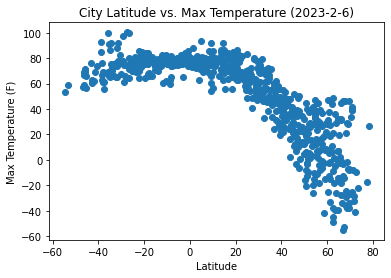

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2023-2-6)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

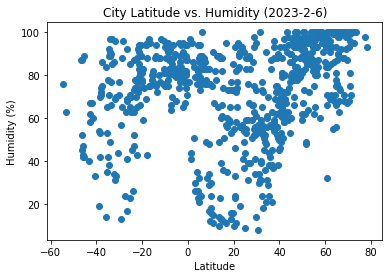

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-2-6)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

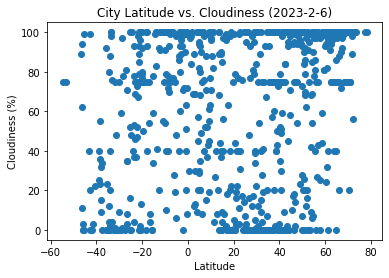

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-2-6)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

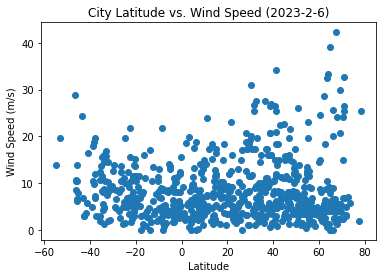

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])
# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-2-6)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0].copy()

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,saratov,51.5667,46.0333,0.73,48,62,5.88,RU,1675720596
4,bay-khaak,51.1667,94.5000,-12.57,97,68,3.51,RU,1675720621
5,zhigansk,66.7697,123.3711,-55.05,100,72,2.28,RU,1675720553
7,kapaa,22.0752,-159.3190,79.12,83,40,16.11,US,1675720623
8,bubaque,11.2833,-15.8333,76.26,67,4,24.02,GW,1675720627


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0].copy()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,quelimane,-17.8786,36.8883,80.55,88,40,0.00,MZ,1675720617
1,busselton,-33.6500,115.3333,66.27,77,98,10.47,AU,1675720618
3,malindi,-3.2175,40.1191,76.53,84,89,11.03,KE,1675720619
6,avarua,-21.2078,-159.7750,84.25,79,75,11.50,CK,1675720622
10,byron bay,-28.6500,153.6167,74.95,65,97,6.62,AU,1675720632


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7212637646814989


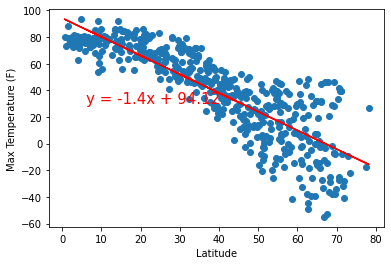

In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Define the title and text coordinates
title = "Max Temp"
text_coordinates = (6,30)

# Call the function to plot linear regression
plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-value is: 0.12233320669183653


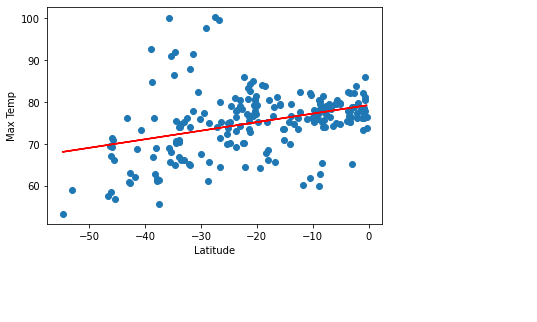

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Define the title and text coordinates
title = "Max Temp"
text_coordinates = (6,30)

# Call the function to plot linear regression
plot_linear_regression(x_values, y_values, title, text_coordinates)

**Discussion about the linear relationship:** The further you get away from the equator in the northern hemipheer the max temp regression declines and has many more data points than the southern hemisphere.  While the southern hemisphere declines, it doesn't as much and doesn't have as many data points most likely due to the amount of land in the southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.22053140461843604


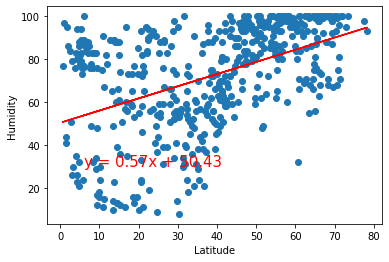

In [27]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Define the title and text coordinates
title = "Humidity"
text_coordinates = (6,30)

# Call the function to plot linear regression
plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-value is: 0.21067412373226804


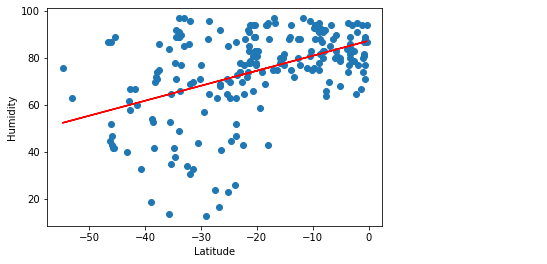

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Define the title and text coordinates
title = "Humidity"
text_coordinates = (6,30)

# Call the function to plot linear regression
plot_linear_regression(x_values, y_values, title, text_coordinates)

**Discussion about the linear relationship:** The linear regression is very similiar to both hemispheres.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08548247342936954


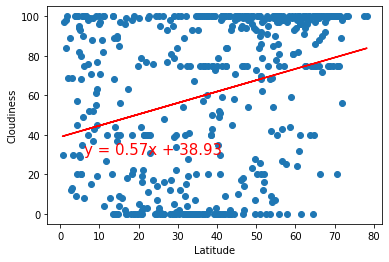

In [28]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Define the title and text coordinates
title = "Cloudiness"
text_coordinates = (6,30)

# Call the function to plot linear regression
plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-value is: 0.19838778226276485


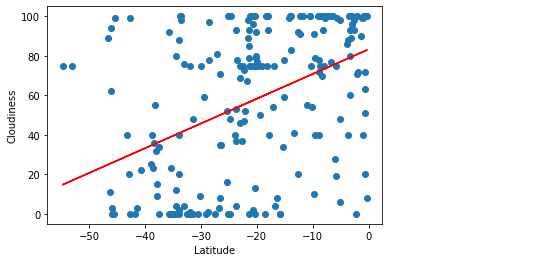

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Define the title and text coordinates
title = "Cloudiness"
text_coordinates = (6,30)

# Call the function to plot linear regression
plot_linear_regression(x_values, y_values, title, text_coordinates)

**Discussion about the linear relationship:** The linear regression in the southern hemisphere is more than the northern hemisphere and also has fewer data points.  

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.002760977315791487


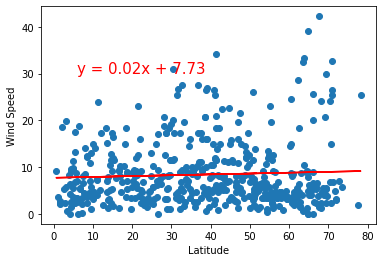

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Define the title and text coordinates
title = "Wind Speed"
text_coordinates = (6,30)

# Call the function to plot linear regression
plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-value is: 0.09452118861265833


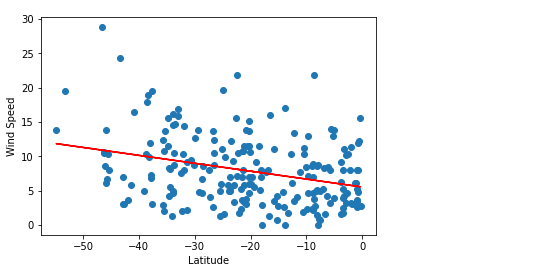

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Define the title and text coordinates
title = "Wind Speed"
text_coordinates = (6,30)

# Call the function to plot linear regression
plot_linear_regression(x_values, y_values, title, text_coordinates)

**Discussion about the linear relationship:** While the southern hemisphere shows a steeper linear regression than the north, the north has more extreme data readings closer to the equator and the linear regression is fairly close to flat. 